In [1]:
# !pip install ipyfilechooser

# show the used python env
import sys
sys.executable

'C:\\Users\\m1srh\\Miniconda3\\envs\\imageanalysis_czi\\python.exe'

In [2]:
# import the required libraries
from aicspylibczi import CziFile
from czitools import czi_metadata as czimd
from czitools import czi_read as czird
from utils import misc, napari_tools
from ipyfilechooser import FileChooser
from IPython.display import display, HTML
import napari

In [3]:
defaultdir = r"D:\Testdata_Zeiss\CZI_Testfiles"
fc = FileChooser(defaultdir)
fc.filter_pattern = '*.czi'
display(fc)

FileChooser(path='D:\Testdata_Zeiss\CZI_Testfiles', filename='', title='HTML(value='', layout=Layout(display='…

In [4]:
# Print the selected path, filename, or both
print(fc.selected_path)
print(fc.selected_filename)
print(fc.selected)

D:\Testdata_Zeiss\CZI_Testfiles
CellDivision_T=15_Z=20_CH=2_DCV.czi
D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=15_Z=20_CH=2_DCV.czi


In [5]:
# get only specific metadata
czi_dimensions = czimd.CziDimensions(fc.selected, dim2none=True)
print("SizeS: ", czi_dimensions.SizeS)
print("SizeT: ", czi_dimensions.SizeT)
print("SizeZ: ", czi_dimensions.SizeZ)
print("SizeC: ", czi_dimensions.SizeC)
print("SizeY: ", czi_dimensions.SizeY)
print("SizeX: ", czi_dimensions.SizeX)

SizeS:  None
SizeT:  15
SizeZ:  20
SizeC:  2
SizeY:  700
SizeX:  700


In [6]:
# and get more info
czi_scaling = czimd.CziScaling(fc.selected, dim2none=True)
czi_channels = czimd.CziChannelInfo(fc.selected)
czi_bbox = czimd.CziBoundingBox(fc.selected)
czi_info = czimd.CziInfo(fc.selected)
czi_objectives = czimd.CziObjectives(fc.selected)
czi_detectors = czimd.CziDetector(fc.selected)
czi_microscope = czimd.CziMicroscope(fc.selected)
czi_sample = czimd.CziSampleInfo(fc.selected)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'


In [7]:
# get the complete metadata at once as one big class
mdata = czimd.CziMetadata(fc.selected)

# get the metadata as a dictionary from class
mdict1 = czimd.create_mdict_complete(mdata, sort=False)
for k,v in mdict1.items():
    print(k, ' : ', v)

# get the CZI metadata dictionary directly from filename
mdict2 = czimd.create_mdict_complete(fc.selected, sort=False)

# convert metadata dictionary to a pandas dataframe
mdframe = misc.md2dataframe(mdict1)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(mdframe.to_html()))

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'
Directory  :  D:\Testdata_Zeiss\CZI_Testfiles
Filename  :  CellDivision_T=15_Z=20_CH=2_DCV.czi
AcqDate  :  2016-02-12T09:41:02.4915604Z
SW-Name  :  ZEN 3.1 (blue edition)
SW-Version  :  3.1.0.0000
czi_dims  :  BTCZYX
czi_dims_shape  :  [{'X': (0, 700), 'Y': (0, 700), 'Z': (0, 20), 'C': (0, 2), 'T': (0, 15), 'B': (0, 1)}]
czi_size  :  (1, 15, 2, 20, 700, 700)
dim_order  :  {'R': -1, 'I': -1, 'M': -1, 'H': -1, 'V': -1, 'B': 0, 'S': -1, 'T': 1, 'C': 2, 'Z': 3, 'Y': 4, 'X': 5, 'A': -1}
dim_index  :  [-1, -1, -1, -1, -1, 0, -1, 1, 2, 3, 4, 5, -1]
dim_valid  :  5
SizeX  :  700
SizeY  :  700
SizeZ  :  20
SizeC  :  2
SizeT  :  15
SizeS  :  None
SizeB  :  1
SizeM  :  None
SizeH  :  None
SizeI  :  None
isRGB  :  False
isMosaic  :  False
ObjNA  :  1.2
ObjMag  :  50

,Parameter,Value
0,Directory,D:\Testdata_Zeiss\CZI_Testfiles
1,Filename,CellDivision_T=15_Z=20_CH=2_DCV.czi
2,AcqDate,2016-02-12T09:41:02.4915604Z
3,SW-Name,ZEN 3.1 (blue edition)
4,SW-Version,3.1.0.0000
5,czi_dims,BTCZYX
6,czi_dims_shape,"[{'X': (0, 700), 'Y': (0, 700), 'Z': (0, 20), 'C': (0, 2), 'T': (0, 15), 'B': (0, 1)}]"
7,czi_size,"(1, 15, 2, 20, 700, 700)"
8,dim_order,"{'R': -1, 'I': -1, 'M': -1, 'H': -1, 'V': -1, 'B': 0, 'S': -1, 'T': 1, 'C': 2, 'Z': 3, 'Y': 4, 'X': 5, 'A': -1}"
9,dim_index,"[-1, -1, -1, -1, -1, 0, -1, 1, 2, 3, 4, 5, -1]"


In [8]:
# write XML to disk
xmlfile = czimd.writexml_czi(fc.selected)
print("XML File written to:", xmlfile)

XML File written to: D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=15_Z=20_CH=2_DCV_CZI_MetaData.xml


In [9]:
# get the planetable for the CZI file
pt, csvfile = czimd.get_planetable(fc.selected,
                          norm_time=True,
                          savetable=True,
                          separator=',',
                          index=True)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(pt.to_html()))
print("PlaneTable CSV File written to:", xmlfile)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'


  0%|          | 0/600 [00:00<?, ?it/s]

,Subblock,Scene,Tile,T,Z,C,X[micron],Y[micron],Z[micron],Time[s],xstart,ystart,width,height
0,0,0,0,0,0,0,16977.153,18621.489,1112.570,0.000000,0,0,700,700
1,1,0,0,0,0,1,16977.153,18621.489,1112.570,0.323019,0,0,700,700
2,2,0,0,0,1,0,16977.153,18621.489,1112.890,0.900052,0,0,700,700
3,3,0,0,0,1,1,16977.153,18621.489,1112.890,1.224070,0,0,700,700
4,4,0,0,0,2,0,16977.153,18621.489,1113.210,1.796103,0,0,700,700
5,5,0,0,0,2,1,16977.153,18621.489,1113.210,2.120122,0,0,700,700
6,6,0,0,0,3,0,16977.153,18621.489,1113.530,2.696154,0,0,700,700
7,7,0,0,0,3,1,16977.153,18621.489,1113.530,3.051175,0,0,700,700
8,8,0,0,0,4,0,16977.153,18621.489,1113.850,3.618207,0,0,700,700
9,9,0,0,0,4,1,16977.153,18621.489,1113.850,3.946226,0,0,700,700


PlaneTable CSV File written to: D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=15_Z=20_CH=2_DCV_CZI_MetaData.xml


In [10]:
# get info from a specific scene
aicsczi = CziFile(fc.selected)
scene = czimd.CziScene(aicsczi, 0)
print("Scene XY-Width-Height :", scene.xstart, scene.ystart, scene.width, scene.height)
print("Scene DimString :", scene.single_scene_dimstr)
print("Scene Shape :", scene.shape_single_scene)

Scene XY-Width-Height : 0 0 700 700
Scene DimString : BTCZYX
Scene Shape : [1, 15, 2, 20, 700, 700]


In [14]:
# read pixel data
all_scenes, mdata = czird.read(fc.selected)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'
No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No valid Scene or Well information found: 'SizeS'
Shape all Scenes :  [1, 15, 2, 20, 700, 700]
DimString all Scenes :  BTCZYX
Shape all scenes (no mosaic) (1, 15, 2, 20, 700, 700)


In [15]:
# show array inside napari viewer
viewer = napari.Viewer()
layers = napari_tools.show(viewer, all_scenes, mdata,
                           blending='additive',
                           contrast='from_czi',
                           gamma=0.85,
                           add_mdtable=True,
                           name_sliders=True)

Adding Channel  : LED555
Shape Channel   : 0 (1, 15, 1, 20, 700, 700)
Scaling Factors : [1.0, 1.0, 3.516, 1.0, 1.0]
Display Scaling from CZI for CH: 0 Min-Max 0.0 5425.0
Adding Channel  : LED470
Shape Channel   : 1 (1, 15, 1, 20, 700, 700)
Scaling Factors : [1.0, 1.0, 3.516, 1.0, 1.0]
Display Scaling from CZI for CH: 1 Min-Max 0.0 30366.0
Rename Sliders based on the Dimension String ....


C:\Users\m1srh\Miniconda3\envs\imageanalysis_czi\lib\site-packages\napari\_vispy\vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


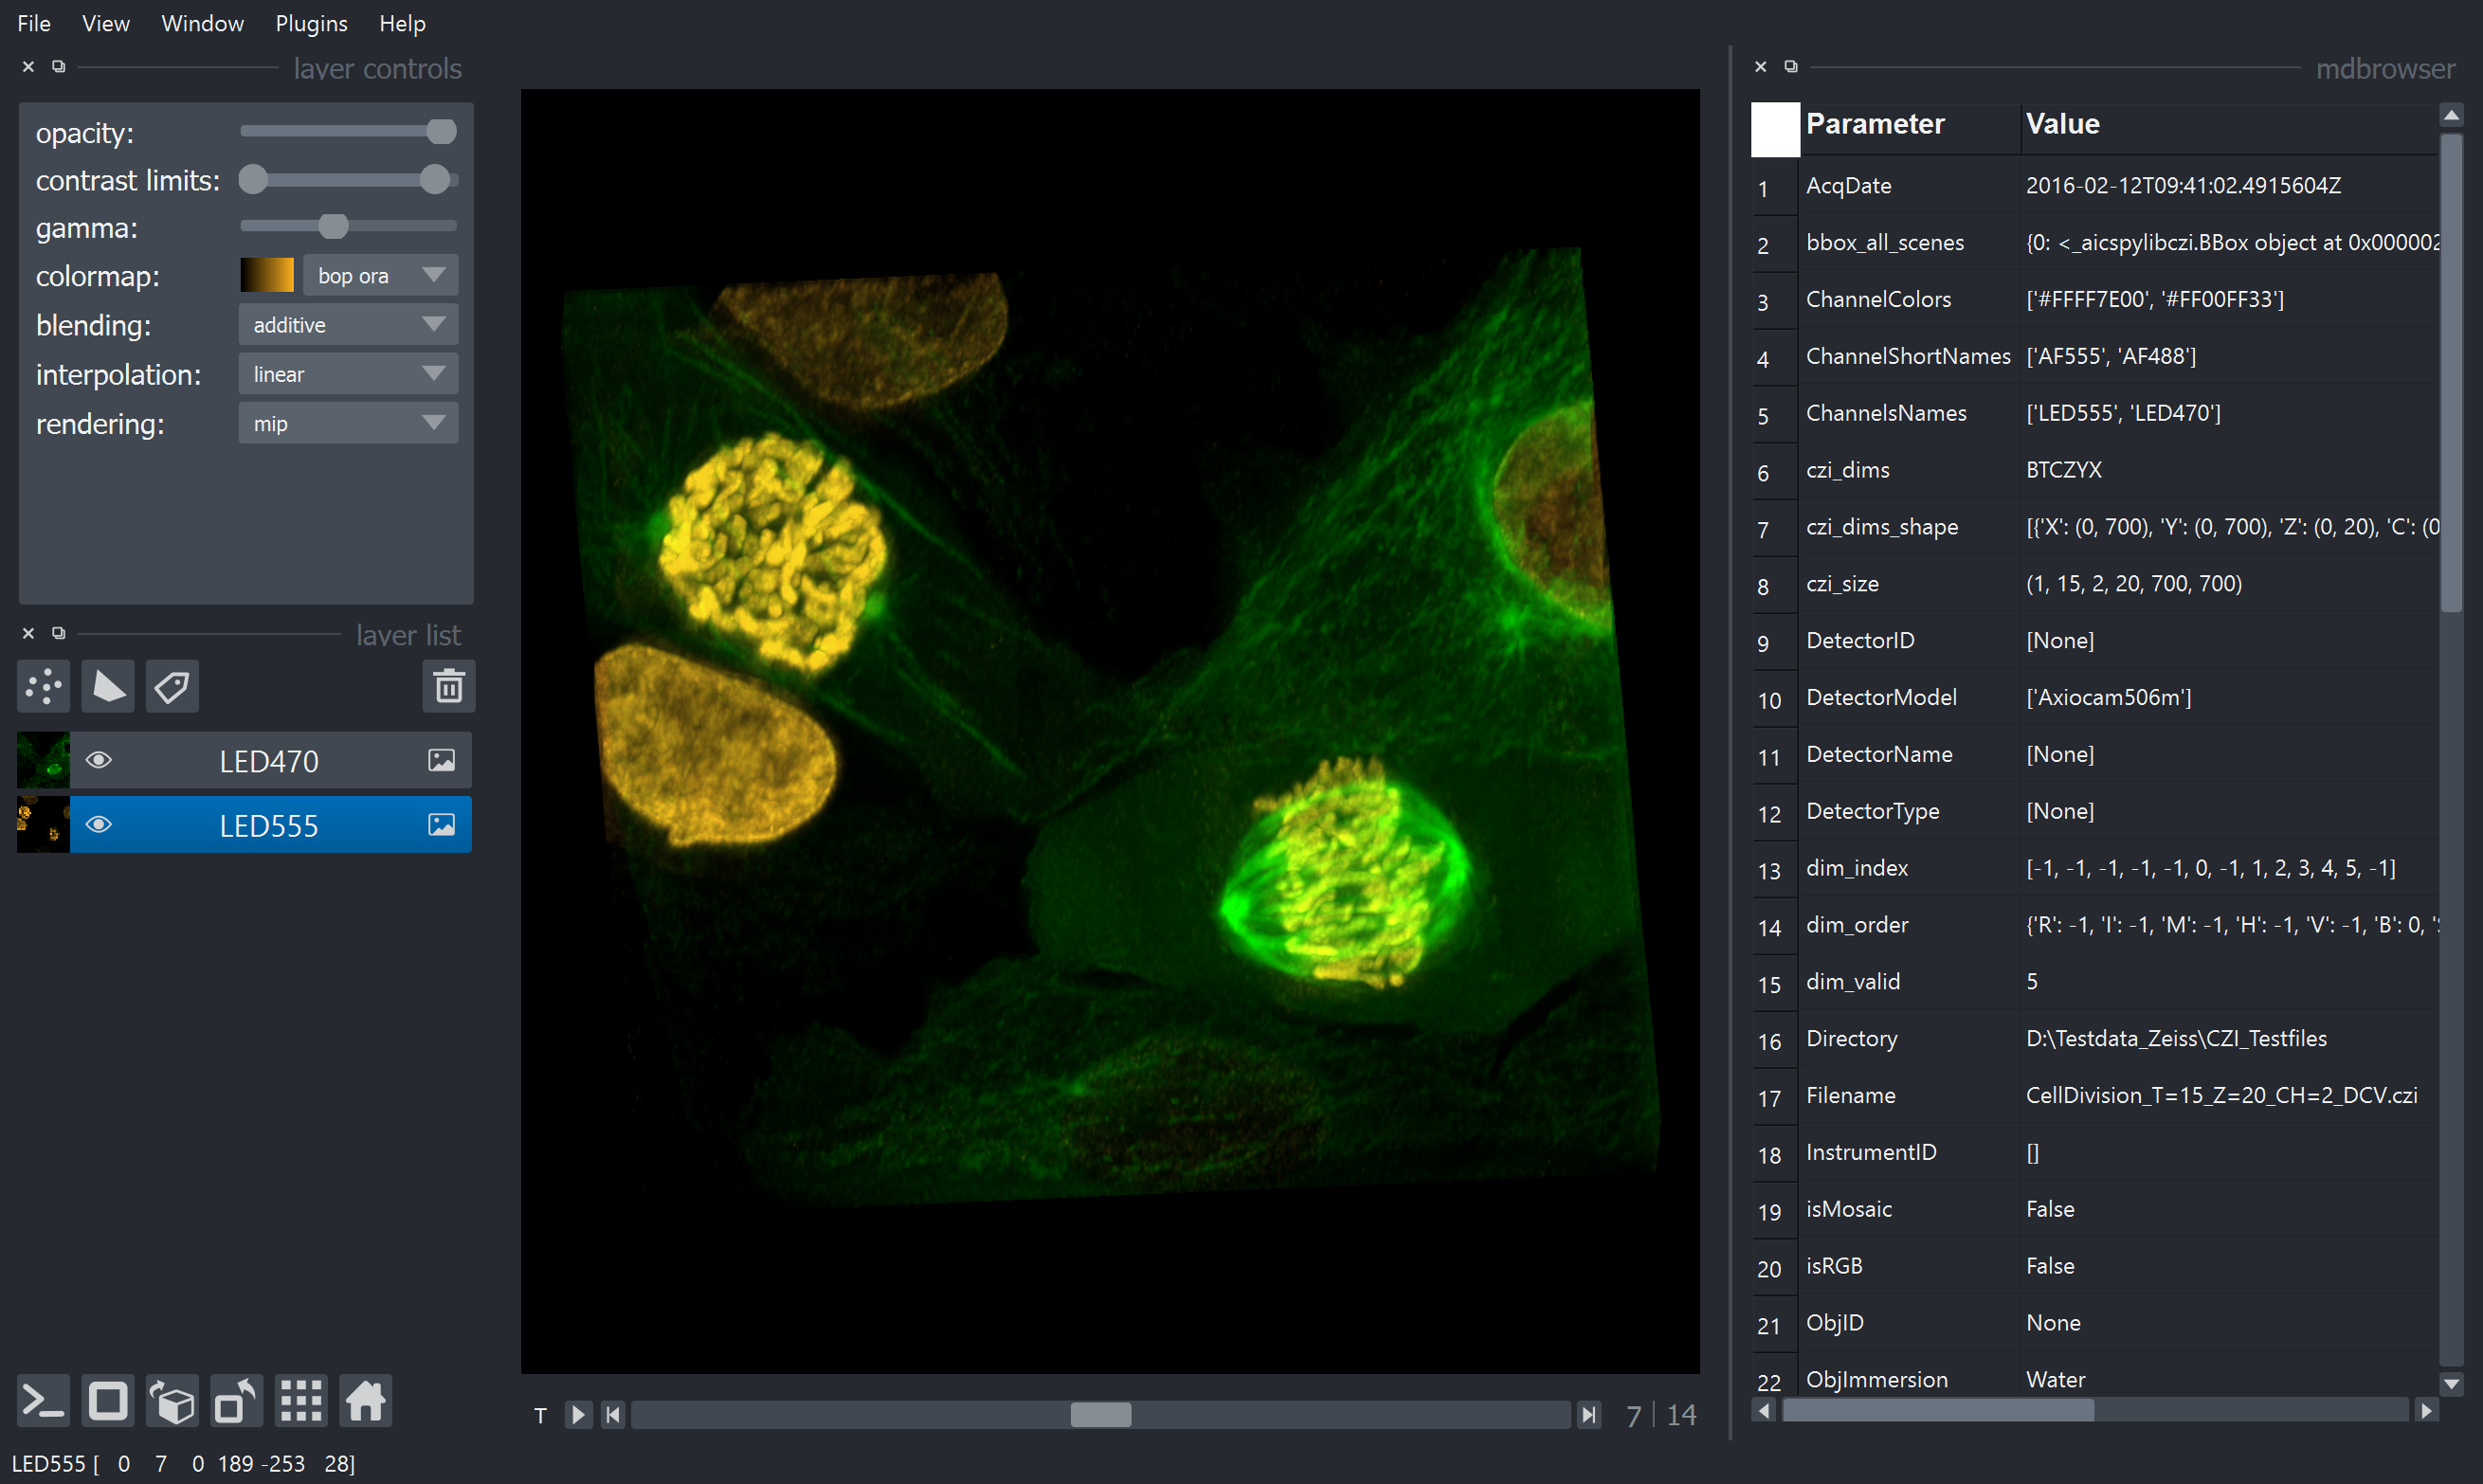

In [16]:
napari.utils.nbscreenshot(viewer)